<a href="https://colab.research.google.com/github/JPedro2/ImageClassificationWorkshop/blob/master/model_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [0]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [0]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
train_labels = train_labels.reshape(train_labels.shape[0], 1)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

In [5]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', padding='same', 
                            input_shape = (28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),       

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.Dense(10, activation = "softmax")])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from time import time

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=[tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 239us/sample - loss: 0.3807 - acc: 0.8641 - val_loss: 0.2948 - val_acc: 0.8921
Epoch 2/20
48000/48000 [==============================] - 8s 163us/sample - loss: 0.2553 - acc: 0.9076 - val_loss: 0.2622 - val_acc: 0.9007
Epoch 3/20
48000/48000 [==============================] - 8s 171us/sample - loss: 0.2041 - acc: 0.9229 - val_loss: 0.2545 - val_acc: 0.9082
Epoch 4/20
48000/48000 [==============================] - 8s 166us/sample - loss: 0.1661 - acc: 0.9376 - val_loss: 0.2700 - val_acc: 0.9062
Epoch 5/20
48000/48000 [==============================] - 8s 163us/sample - loss: 0.1346 - acc: 0.9500 - val_loss: 0.2798 - val_acc: 0.9062
Epoch 6/20
48000/48000 [==============================] - 8s 164us/sample - loss: 0.1051 - acc: 0.9605 - val_loss: 0.2749 - val_acc: 0.9162
Epoch 7/20
48000/48000 [==============================] - 8s 165us/sample - loss: 0.0866 - acc: 0.9676 - val_

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 54us/sample - loss: 0.5509 - acc: 0.9075
Test accuracy: 0.9075


# Plot Accuracy over time for comparison

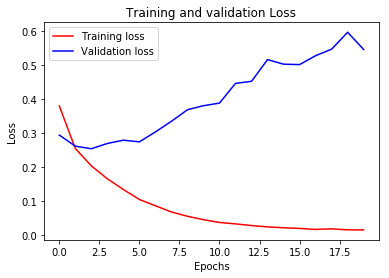

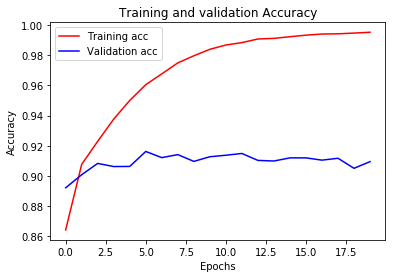

In [9]:
#model.fit() returns a History object that contains a dictionary with everything that happened during training:
history_dict = history.history
history_dict.keys()

# There are four entries: one for each monitored metric during training and validation. 
# We can use these to plot the training and validation loss and accuracy for comparison.
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#epochs = range(1, len(acc) + 1)
epochs = range(len(acc))


# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()



# Define EarlyStopping Callbacks

In [0]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', padding='same', 
                            input_shape = (28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),       

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.Dense(10, activation = "softmax")])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=2) # Try with 3

In [11]:
from time import time

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

history = model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=[earlystop, tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 8s 174us/sample - loss: 0.3832 - acc: 0.8614 - val_loss: 0.2958 - val_acc: 0.8950
Epoch 2/20
48000/48000 [==============================] - 8s 171us/sample - loss: 0.2557 - acc: 0.9061 - val_loss: 0.2672 - val_acc: 0.9001
Epoch 3/20
48000/48000 [==============================] - 8s 170us/sample - loss: 0.2057 - acc: 0.9232 - val_loss: 0.2434 - val_acc: 0.9103
Epoch 4/20
48000/48000 [==============================] - 8s 163us/sample - loss: 0.1669 - acc: 0.9380 - val_loss: 0.2378 - val_acc: 0.9152
Epoch 5/20
48000/48000 [==============================] - 8s 166us/sample - loss: 0.1339 - acc: 0.9496 - val_loss: 0.2624 - val_acc: 0.9137
Epoch 6/20
48000/48000 [==============================] - 8s 165us/sample - loss: 0.1089 - acc: 0.9595 - val_loss: 0.2742 - val_acc: 0.9108


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 56us/sample - loss: 0.2868 - acc: 0.9097
Test accuracy: 0.9097


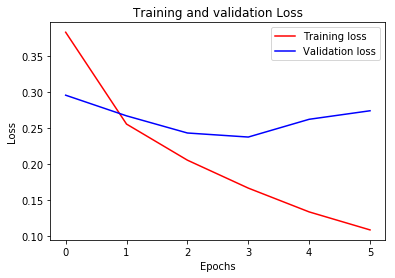

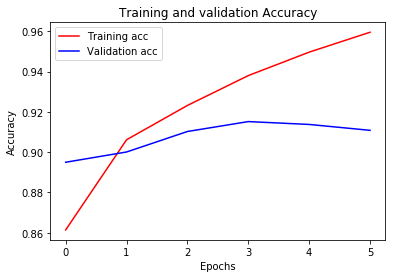

In [13]:
#model.fit() returns a History object that contains a dictionary with everything that happened during training:
history_dict = history.history
history_dict.keys()

# There are four entries: one for each monitored metric during training and validation. 
# We can use these to plot the training and validation loss and accuracy for comparison.
acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

#epochs = range(1, len(acc) + 1)
epochs = range(len(acc))


# "r" is for "solid red line"
plt.plot(epochs, loss, 'r', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc=0)
plt.show()

# Next Steps

By playing with the _early stop_ method we can see that the loss is significantly decreased, together with the model training duration without affecting the accuracy. Now, from the graphs above it does look like there is still room to improve the model, as we should aim for a smaller gap between both the _tranning_ & _validation loss_, as well as _trainning_ & _validation accuracy_. For that we need to find a way to make the model better at generalising. To achieve that, on the next and final section, we will be looking at adding a _Dropout layer_, which randomly and temporarily drops out nodes during the tranning phase of the model. 

[Prev](https://github.com/JPedro2/ImageClassificationWorkshop/blob/master/model_2.ipynb) - [Next]((https://github.com/JPedro2/ImageClassificationWorkshop/blob/master/model_4.ipynb))